<a href="https://colab.research.google.com/github/MonoaraAkter/ML-Lab/blob/main/salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
file_path = 'Salary_Data.csv'  # Default path in Colab after upload
df = pd.read_csv(file_path)

In [ ]:
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB

First 5 rows:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's     

In [ ]:
df = df.dropna(subset=['Salary', 'Years of Experience'])

In [ ]:
#Convert types if needed (Salary and Years of Experience should be numeric)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

In [ ]:
# Calculate average salary by gender
avg_salary_by_gender = df.groupby('Gender')['Salary'].mean().reset_index().sort_values('Salary', ascending=False)

In [ ]:
# Calculate average salary by education level
avg_salary_by_education = df.groupby('Education Level')['Salary'].mean().reset_index().sort_values('Salary', ascending=False)

In [ ]:
# Top 10 job titles by average salary
top_jobs_by_salary = df.groupby('Job Title')['Salary'].mean().reset_index().sort_values('Salary', ascending=False).head(10)

In [ ]:
# Average salary by years of experience (binned)
df['Experience_Bin'] = pd.cut(df['Years of Experience'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['0-5', '6-10', '11-15', '16-20', '21+'])
avg_salary_by_experience = df.groupby('Experience_Bin')['Salary'].mean().reset_index()

/tmp/ipython-input-1954151294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_experience = df.groupby('Experience_Bin')['Salary'].mean().reset_index()


In [ ]:
# Print summaries
print("\nAverage Salary by Gender:")
print(avg_salary_by_gender)
print("\nAverage Salary by Education Level:")
print(avg_salary_by_education)
print("\nTop 10 Job Titles by Average Salary:")
print(top_jobs_by_salary)
print("\nAverage Salary by Experience Bin:")
print(avg_salary_by_experience)


Average Salary by Gender:
   Gender         Salary
2   Other  125869.857143
1    Male  121389.870915
0  Female  107888.998672

Average Salary by Education Level:
     Education Level         Salary
5                PhD  165684.828947
3           Master's  157604.166667
4    Master's Degree  125075.333969
0         Bachelor's  124767.658730
6                phD  120000.000000
1  Bachelor's Degree   85174.886093
2        High School   36706.694196

Top 10 Job Titles by Average Salary:
                       Job Title         Salary
7                            CEO  250000.000000
9       Chief Technology Officer  250000.000000
8             Chief Data Officer  220000.000000
28      Director of Data Science  204561.403509
26                      Director  200000.000000
189                VP of Finance  200000.000000
102          Operations Director  190000.000000
190             VP of Operations  190000.000000
33   Director of Human Resources  187500.000000
96            Marketing Directo

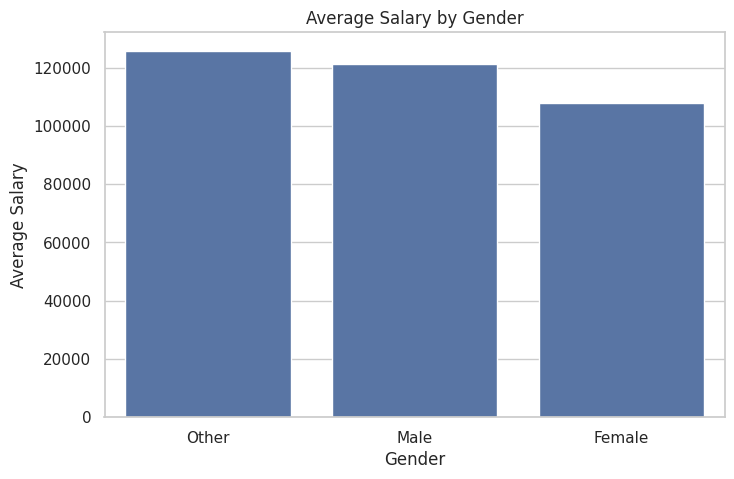

In [ ]:
# Plot 1: Bar plot of Average Salary by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Salary', data=avg_salary_by_gender)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

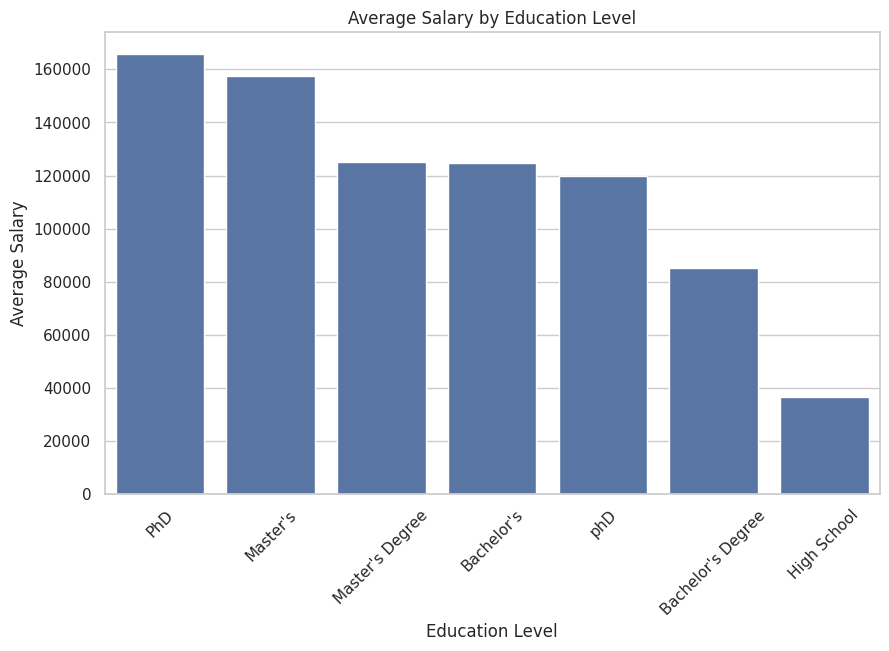

In [ ]:
# Plot 2: Bar plot of Average Salary by Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=avg_salary_by_education)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

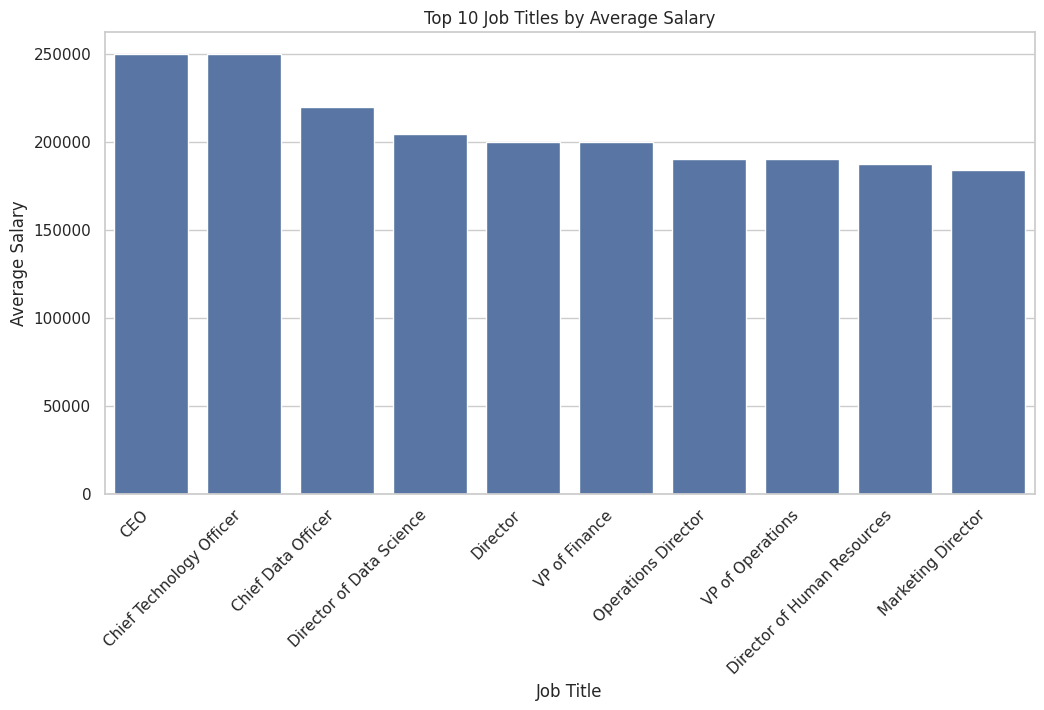

In [ ]:
# Plot 3: Bar plot of Top 10 Job Titles by Average Salary
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Title', y='Salary', data=top_jobs_by_salary)
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

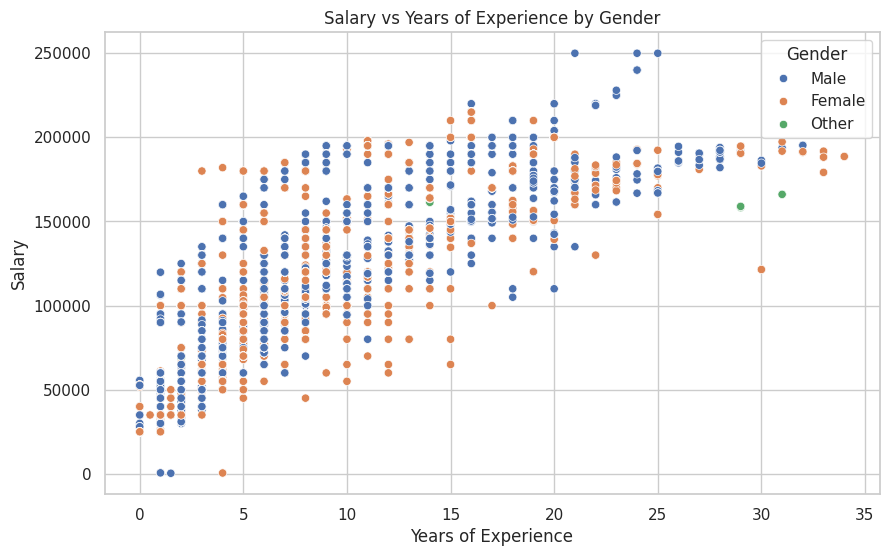

In [ ]:
# Plot 4: Scatter plot of Salary vs Years of Experience, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=df)
plt.title('Salary vs Years of Experience by Gender')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

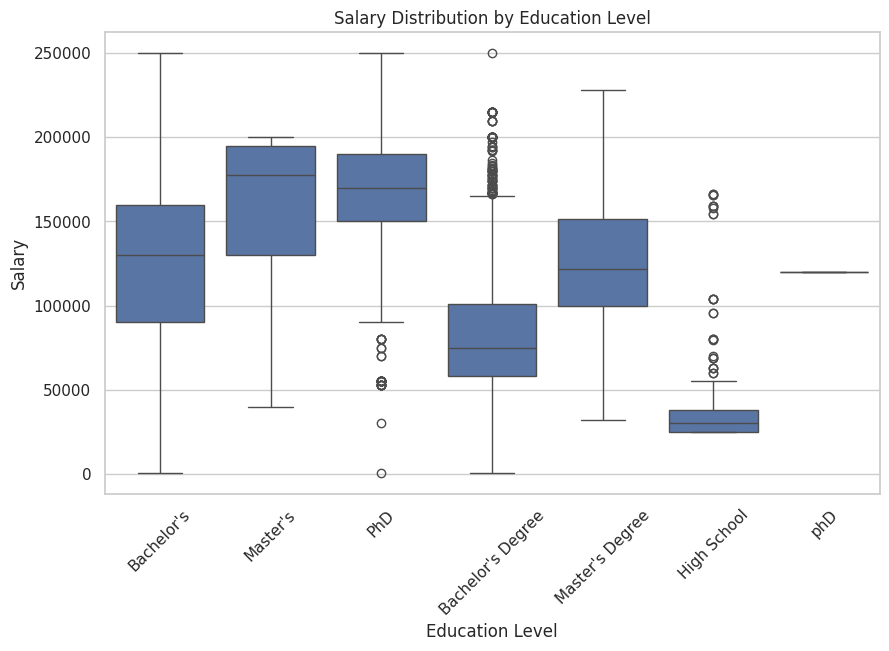

In [ ]:
# Plot 5: Box plot of Salary by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

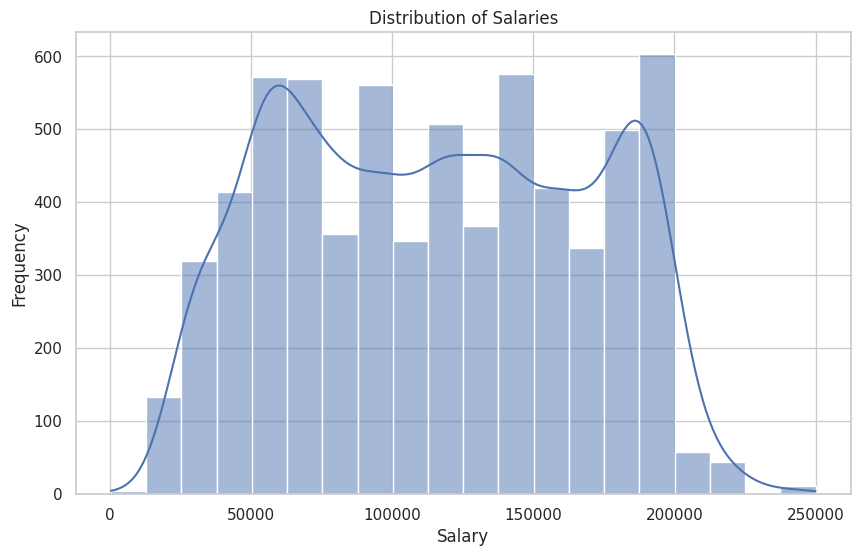

In [ ]:
# Plot 6: Histogram of Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

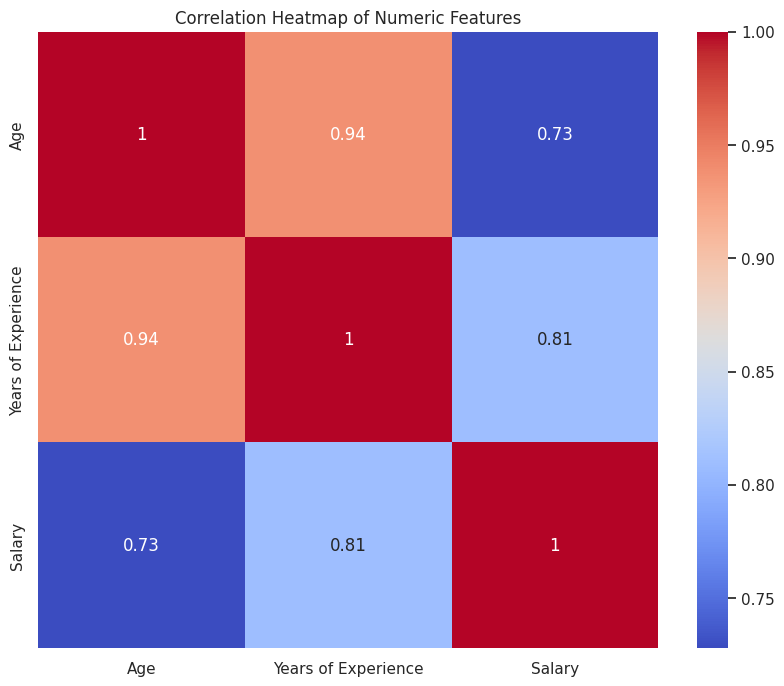

In [ ]:
# Additional: Correlation heatmap of numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()